# Recolección y manejo de los datos

1) Transfiera  el  dataset  a  un  frame  panda  utilizando  el  método `pd.read.csv(‘dirección_dataset_cargado.csv’)`

In [5]:
!git clone https://github.com/ChenaoB/Database

fatal: destination path 'Database' already exists and is not an empty directory.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataLeastSquareClasificationtTwoClassOutliers.csv")

2) Divida el dataset de la siguiente forma: 75% para entrenamiento el restante para validación

In [8]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

"""
Tengo 2 entradas: X1 X2 (Por tanto es un problema biclase)
Tengo 2 tags: 1, -1 (Esto sería 1 salida)
"""
print(train_set[:5])
print(test_set[:5])

           X1        X2  Y
37   1.503395  1.563814 -1
26  -0.587718 -0.803617 -1
42   0.002065 -0.724401 -1
93  -0.881775  0.396641  1
102  7.492510 -7.345252 -1
          X1        X2  Y
4   2.806944  2.885193 -1
9   0.476725 -0.366186 -1
12  2.830055  2.794111 -1
13  0.289153 -0.591639 -1
14  2.155935  1.772786 -1


# Modelo del perceptron

Entradas
 - X (x_train / x_test)
 - y (y_train / y_test)
 - w nombrado "weight" (Pesos iniciales)
 - α nombrado "alpha" (Learning rate)

In [9]:
# Construcción de matrices

"""
Matriz de etiquetas
"""
y_train = np.zeros((train_set.shape[0], 1))
y_test = np.zeros((test_set.shape[0], 1))

y_train = train_set["Y"].values
y_test = test_set["Y"].values

"""
Matriz de datos
"""
x_train = np.zeros((train_set.shape[0], 2 + 1))
x_test = np.zeros((test_set.shape[0], 2 + 1))

x_train[:, 0:2] = train_set[["X1", "X2"]].values
x_train[:, 2] = np.ones(train_set.shape[0])

x_test[:, 0:2] = test_set[["X1", "X2"]].values
x_test[:, 2] = np.ones(test_set.shape[0])

# Se muestran los primeros 5 datos para verificación

print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{y_train[:5]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{y_test[:5]}")

Matriz de datos de entrenamiento: 
[[1.503394836, 1.56381399, 1.0], [-0.587718367, -0.8036170229, 1.0], [0.002064944654, -0.724400688, 1.0], [-0.881775114, 0.3966414978, 1.0], [7.492509634, -7.345252163, 1.0]]
Matriz de etiquetas de entrenamiento: 
[-1 -1 -1  1 -1]

Matriz de datos de test: 
[[2.806944365, 2.885193104, 1.0], [0.4767252453, -0.3661856701, 1.0], [2.830055031, 2.794110605, 1.0], [0.2891528229, -0.5916386772, 1.0], [2.155935155, 1.772785562, 1.0]]
Matriz de etiquetas de test: 
[-1 -1 -1 -1 -1]


3) Inicialice el vector de parámetros W utilizando algún método de muestreo estadístico, recuerde que para un problema biclase W este tiene tres valores.

In [10]:
# Usando una distribución uniforme

weight = np.random.rand(3)
print(f"Pesos iniciales (w): {weight}")

Pesos iniciales (w): [0.20302797 0.30247319 0.75321012]


4) Establezca un valor de α (Learning rate) = 0.3

In [11]:
alpha = 0.3

In [12]:
iteration = 1000

In [13]:
use_umbral = False

5) Implemente el algoritmo de perceptron para actualizar los valores del vector de parámetros 𝑊 (puede utilizar cualquiera de las alternativas estudiadas en clase)

In [14]:
if use_umbral:
  for iter in range(iteration):
    for item in range(train_set.shape[0]):

      tag = np.sign(np.dot(weight, np.transpose(x_train[item, :])))

      if (y_train[item] == 1 and tag != y_train[item]):
        weight += alpha * np.transpose(x_train[item, :])
      elif (y_train[item] == -1 and tag != y_train[item]):
        weight -= alpha * np.transpose(x_train[item, :])
      else:
        weight = weight

In [15]:
if not use_umbral:
  for iter in range(iteration):
    for item in range(train_set.shape[0]):

      y_predict = np.sign(np.dot(weight, np.transpose(x_train[item, :])))

      x_transposed = np.transpose(x_train[item, :])

      weight = weight - 2 * alpha * x_transposed * (y_predict - y_train[item])

# Analisis del algoritmo

Se grafica:

*   $X1_{train}$ vs $X2_{train}$
*   $X1_{test}$ vs $X2_{test}$
*   Plano de decisión $- \frac{W[2] + W[0] X1_{train}}{W[1]}$

In [16]:
# Curva de decisión

curve_size = np.arange(-3, 5, 3)
curve_length = -(weight[2] + weight[0] * curve_size) / weight[1]

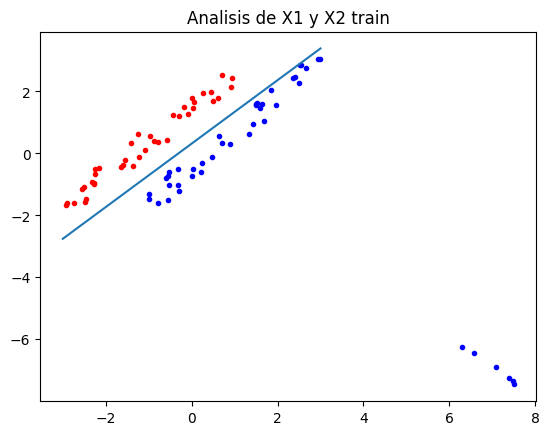

In [17]:
"""
Grafica de X1 vs X2 (Train)
"""
index_tag_class_1 = np.where(y_train == 1)
index_tag_class_2 = np.where(y_train == -1)

tag_class_1 = train_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = train_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], ".r", label="(Train) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], ".b", label="(Train) X2")


"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis de X1 y X2 train")
plt.show()

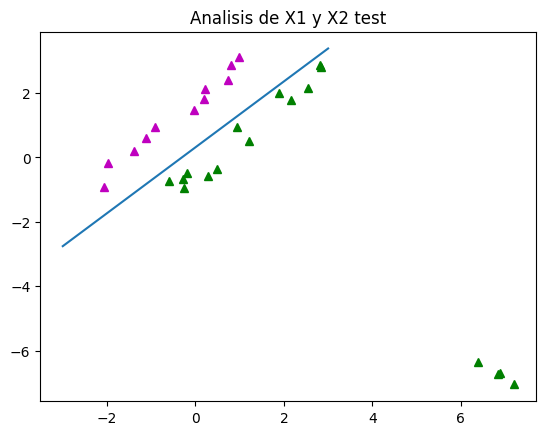

In [18]:
"""
Grafica de X1 vs X2 (Test)
"""
index_tag_class_1 = np.where(y_test == 1)
index_tag_class_2 = np.where(y_test == -1)

tag_class_1 = test_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = test_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], "^m", label="(Test) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], "^g", label="(Test) X2")


"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis de X1 y X2 test")
plt.show()

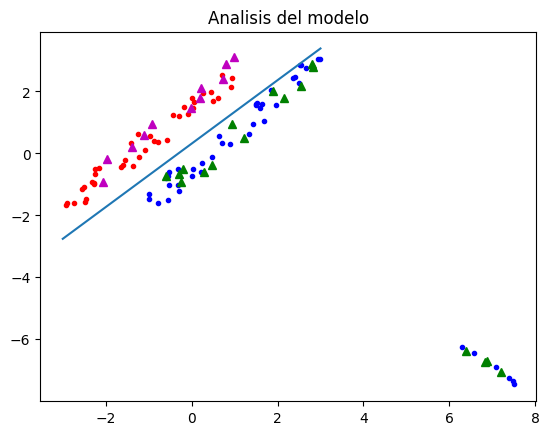

In [19]:
# Grafico de los datos en una misma imagen

"""
Grafica de X1 vs X2 (Train)
"""
index_tag_class_1 = np.where(y_train == 1)
index_tag_class_2 = np.where(y_train == -1)

tag_class_1 = train_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = train_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], ".r", label="(Train) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], ".b", label="(Train) X2")

"""
Grafica de X1 vs X2 (Test)
"""
index_tag_class_1 = np.where(y_test == 1)
index_tag_class_2 = np.where(y_test == -1)

tag_class_1 = test_set[["X1", "X2"]].iloc[index_tag_class_1]
tag_class_2 = test_set[["X1", "X2"]].iloc[index_tag_class_2]

plt.plot(tag_class_1["X1"], tag_class_1["X2"], "^m", label="(Test) X1")
plt.plot(tag_class_2["X1"], tag_class_2["X2"], "^g", label="(Test) X2")

"""
Grafico de la curva de decisión
"""
plt.plot(curve_size, curve_length, label = "Curva de decisión")

plt.title("Analisis del modelo")
plt.show()

In [20]:
'''
Extrayendo caracteristicas para la matriz de confusión
'''

# Función para obtener las predicciones del perceptrón
def predict(weight, x):
    return np.sign(np.dot(weight, np.transpose(x)))

# Obtener las predicciones en el conjunto de prueba
predictions = np.array([predict(weight, data) for data in x_test])

# Construir la matriz de confusión
confusion_matrix = np.zeros((2, 2))  # 2 clases (1 y -1)

for i in range(len(y_test)):
    true_class = int((y_test[i] + 1) / 2)  # Convertir -1 y 1 a 0 y 1
    predicted_class = int((predictions[i] + 1) / 2)
    confusion_matrix[true_class][predicted_class] += 1

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix)

Matriz de Confusión:
[[17.  0.]
 [ 0. 11.]]


In [21]:
'''
Otras analisticas extraidas de la matriz de confusión
'''

TP = confusion_matrix[1][1] # True Positive
TN = confusion_matrix[0][0] # True Negative
FP = confusion_matrix[0][1] # False Positive
FN = confusion_matrix[1][0] # False Negative

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f"Precisión: {precision}")
print(f"Sensibilidad: {sensitivity}")
print(f"Especificidad: {specificity}")
print(f"Exactitud: {accuracy}")
print(f"F1 Score: {f1_score}")

Precisión: 1.0
Sensibilidad: 1.0
Especificidad: 1.0
Exactitud: 1.0
F1 Score: 1.0


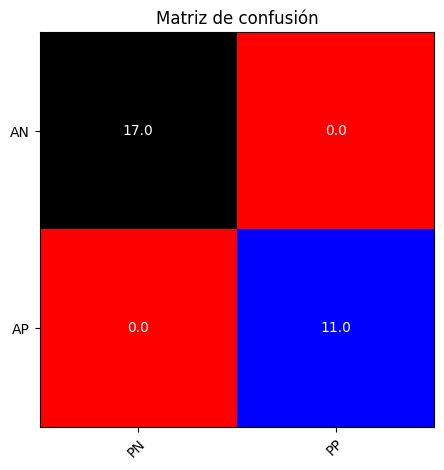

In [22]:
actual_label = ["AN", "AP"]
predicted_label = ["PN", "PP"]

fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap=plt.colormaps["flag"].resampled(7))

# Para agregar los labels
ax.set_xticks(np.arange(len(predicted_label)), labels=predicted_label)
ax.set_yticks(np.arange(len(actual_label)), labels=actual_label)


# Para centrar los textos
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Para poner los números a cada recuadro.
for i in range(len(predicted_label)):
    for j in range(len(actual_label)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="w")

ax.set_title("Matriz de confusión")
fig.tight_layout()
plt.show()